In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [43]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("movies2.csv")
tags = pd.read_csv("tags2.csv")
ratings = pd.read_csv("ratings2.csv")
links = pd.read_csv("links2.csv")

In [44]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [45]:
movies = movies.drop_duplicates(subset="title")

In [46]:
movies[movies["genres"] == "(no genres listed)"]

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [47]:
movies["genres"].value_counts()

Drama                                       1053
Comedy                                       946
Comedy|Drama                                 435
Comedy|Romance                               363
Drama|Romance                                348
                                            ... 
Action|Crime|Drama|War                         1
Action|Children|Sci-Fi|IMAX                    1
Action|Adventure|Comedy|Fantasy|Horror         1
Adventure|Children|Comedy|Romance|Sci-Fi       1
Comedy|War|Western                             1
Name: genres, Length: 951, dtype: int64

In [48]:
movies.describe()

,movieId
count,9737.000000
mean,42165.340865
std,52136.321521
min,1.000000
25%,3247.000000
50%,7294.000000
75%,76173.000000
max,193609.000000


In [49]:
def convert_timestamp(data):
    date = []
    for timestamp in data["timestamp"]:
        to_date = datetime.fromtimestamp(timestamp).strftime('%d-%m-%y')
        date.append(to_date)
    data["date"] = date
    del data["timestamp"]
    return data

In [50]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [51]:
ratings = convert_timestamp(ratings)
ratings

,userId,movieId,rating,date
0,1,1,4.0,30-07-00
1,1,3,4.0,30-07-00
2,1,6,4.0,30-07-00
3,1,47,5.0,30-07-00
4,1,50,5.0,30-07-00
...,...,...,...,...
100831,610,166534,4.0,04-05-17
100832,610,168248,5.0,04-05-17
100833,610,168250,5.0,08-05-17
100834,610,168252,5.0,04-05-17


In [52]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [53]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [54]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [55]:
data = ratings.merge(movies,on='movieId')
data = data.merge(links,on='movieId')
data = data.drop(columns = 'tmdbId')
data["imdbId"] = "www.imdb.com/title/tt" + data["imdbId"].astype(str)
data.rename(columns = {'imdbId':'link'}, inplace = True)
data['published year'] = data.title.str.extract('(\(\d\d\d\d\))',expand=False)

In [56]:
data

,userId,movieId,rating,date,title,genres,link,published year
0,1,1,4.0,30-07-00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
1,5,1,4.0,08-11-96,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
2,7,1,4.5,25-01-05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
3,15,1,2.5,13-11-17,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
4,17,1,4.5,18-05-11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
...,...,...,...,...,...,...,...,...
100825,610,160341,2.5,19-11-16,Bloodmoon (1997),Action|Thriller,www.imdb.com/title/tt118745,(1997)
100826,610,160527,4.5,19-11-16,Sympathy for the Underdog (1971),Action|Crime|Drama,www.imdb.com/title/tt66806,(1971)
100827,610,160836,3.0,03-05-17,Hazard (2005),Action|Drama|Thriller,www.imdb.com/title/tt798722,(2005)
100828,610,163937,3.5,04-05-17,Blair Witch (2016),Horror|Thriller,www.imdb.com/title/tt1540011,(2016)


### No row dublicated in the data

In [57]:
data.duplicated(["movieId","userId", "rating", "date"]).sum()

0

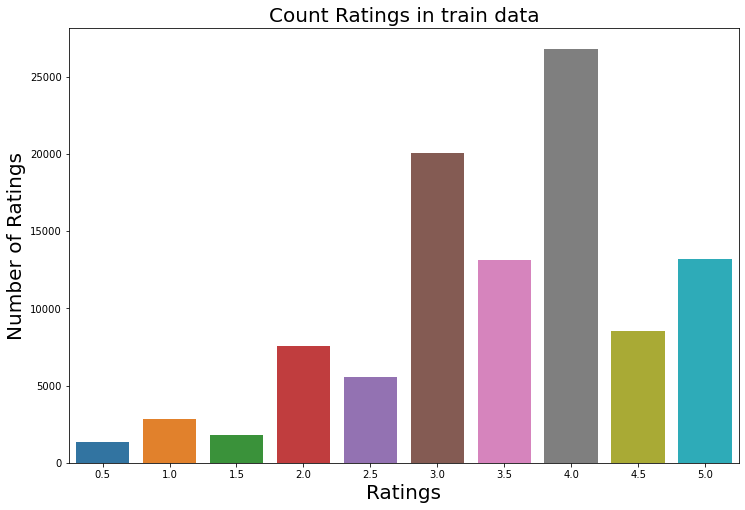

In [58]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data = data)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

### Find the number of rated movies per user

In [59]:
num_rated_movies_per_user = data.groupby(by = "userId")["rating"].count().sort_values(ascending = False)
num_rated_movies_per_user.head()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: rating, dtype: int64

### Find the rating number per Movie

In [60]:
num_ratings_per_movie = data.groupby(by = "title")["rating"].count().sort_values(ascending = False)
num_ratings_per_movie.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [61]:
data.describe()

,userId,movieId,rating
count,100830.000000,100830.000000,100830.000000
mean,326.131618,19430.333839,3.501567
std,182.616577,35523.902852,1.042548
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8118.750000,4.000000
max,610.000000,193609.000000,5.000000


In [62]:
avg_rating = data.groupby('title').rating.sum()/data.groupby('title').rating.count()
avg_rating.sort_values(ascending = False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

<AxesSubplot:>

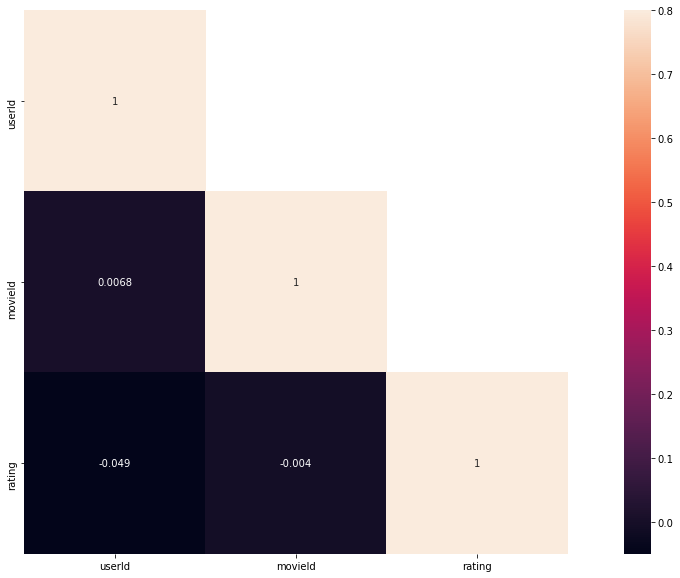

In [63]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<div style = "color: blue"> <h3> no outlires in the data to remove </h3></div>

In [64]:
def get_feature_types_stats(df):
    # Find datatype for each feature in the data and return it with features name
    features = df.dtypes.rename('feature_type').reset_index().rename(columns={'index':'feature'})
    return features

def get_feature_stats(df):
    # Find missing percentage and missing count in the original data for each featue and return it
    missing_stats = df.isna().sum().rename('missing_count').reset_index().rename(columns={'index':'feature'})
    missing_stats['missing_percentage'] = missing_stats['missing_count']/df.shape[0]
    
    feature_types_df = get_feature_types_stats(df)
    
    missing_stats = missing_stats.merge(feature_types_df,
                         left_on='feature',
                         right_on='feature',
                         how='left')
    return missing_stats

In [65]:
missing_data = get_feature_stats(data)

In [66]:
missing_data

,feature,missing_count,missing_percentage,feature_type
0,userId,0,0.000000,int64
1,movieId,0,0.000000,int64
2,rating,0,0.000000,float64
3,date,0,0.000000,object
4,title,0,0.000000,object
5,genres,0,0.000000,object
6,link,0,0.000000,object
7,published year,18,0.000179,object


In [67]:
data = data.dropna()

### Check outlires in the data

In [68]:
def compute_outlires(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    columns_outlires = IQR[IQR >= 15]
    print(columns_outlires)

In [69]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    data = data[~data.isin(outliers)]
    data = data[data['userId'].notnull()]
    return data

In [70]:
compute_outlires(data)

userId      300.0
movieId    6843.0
dtype: float64


In [71]:
data = remove_outliers(data, "movieId")
data = remove_outliers(data, "userId")

In [73]:
data

,userId,movieId,rating,date,title,genres,link,published year
0,1.0,1.0,4.0,30-07-00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
1,5.0,1.0,4.0,08-11-96,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
2,7.0,1.0,4.5,25-01-05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
3,15.0,1.0,2.5,13-11-17,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
4,17.0,1.0,4.5,18-05-11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
...,...,...,...,...,...,...,...,...
100674,610.0,6095.0,3.5,19-11-16,Dragon Lord (a.k.a. Dragon Strike) (Long Xiao ...,Action,www.imdb.com/title/tt84266,(1982)
100675,610.0,7202.0,3.0,04-05-17,Beyond Re-Animator (2003),Horror,www.imdb.com/title/tt222812,(2003)
100676,610.0,7562.0,2.5,19-11-16,Dobermann (1997),Action|Crime,www.imdb.com/title/tt118996,(1997)
100677,610.0,7984.0,4.0,28-05-17,From Beyond (1986),Horror|Sci-Fi,www.imdb.com/title/tt91083,(1986)


In [74]:
data.to_csv(r'movie_recommendation.csv', index = False)